(Text(0.5, 1.0, 'Multiple Region'), ([], []), ([], []))

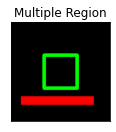

In [62]:
import numpy as np
import cv2

# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas1 = np.zeros((300, 300, 3), dtype="uint8")
green=(0,255,0)
cv2.rectangle(canvas1, (100, 100), (200,200), green,10)

red = (255,0,0)
cv2.rectangle(canvas1, (30, 225), (250, 250), red, -1)

plt.subplot(221), plt.imshow(canvas1, cmap='gray')
plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])
#cv2.imshow("Canvas", canvas)
#cv2.waitKey(0)

(Text(0.5, 1.0, 'Multiple Region'), ([], []), ([], []))

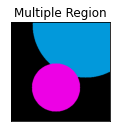

In [83]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")
# let's draw 25 random circles
for i in range(0, 2):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(10, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))
	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)
plt.subplot(221), plt.imshow(canvas, cmap='gray')
plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Single Region'), ([], []), ([], []))

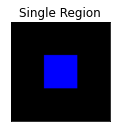

In [82]:
import numpy as np
import cv2

# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas3 = np.zeros((300, 300, 3), dtype="uint8")
blue=(0,0,255)
cv2.rectangle(canvas3, (100, 100), (200,200), blue,-1)



plt.subplot(221), plt.imshow(canvas3, cmap='gray')
plt.title('Single Region'), plt.xticks([]), plt.yticks([])
#cv2.imshow("Canvas", canvas)
#cv2.waitKey(0)